# Corona Notebook
## Projektarbeit Informationsvisualisierung
---


### Einbinden der benötigten Bibliotheken:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

---
### Dataset einbinden:

In [2]:
data = pd.read_csv('../data/owid-covid-data.csv') 
data


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26058,OWID_WRL,NaN,World,2020-06-28,9953229.0,181386.0,498550.0,4633.0,1276.906,23.270,...,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58
26059,OWID_WRL,NaN,World,2020-06-29,10113462.0,160233.0,501597.0,3047.0,1297.463,20.556,...,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58
26060,OWID_WRL,NaN,World,2020-06-30,10273424.0,159962.0,505309.0,3712.0,1317.985,20.522,...,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58
26061,OWID_WRL,NaN,World,2020-07-01,10465987.0,192563.0,511045.0,5736.0,1342.689,24.704,...,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58


Speichern des Datasets in der Variablen "data"; 
Daten reichen vom 31.12.2019 bis zum 02.07.2020

---
### Erste Graphen:

#### Allgemeiner Graph über mittlere Todesfälle:

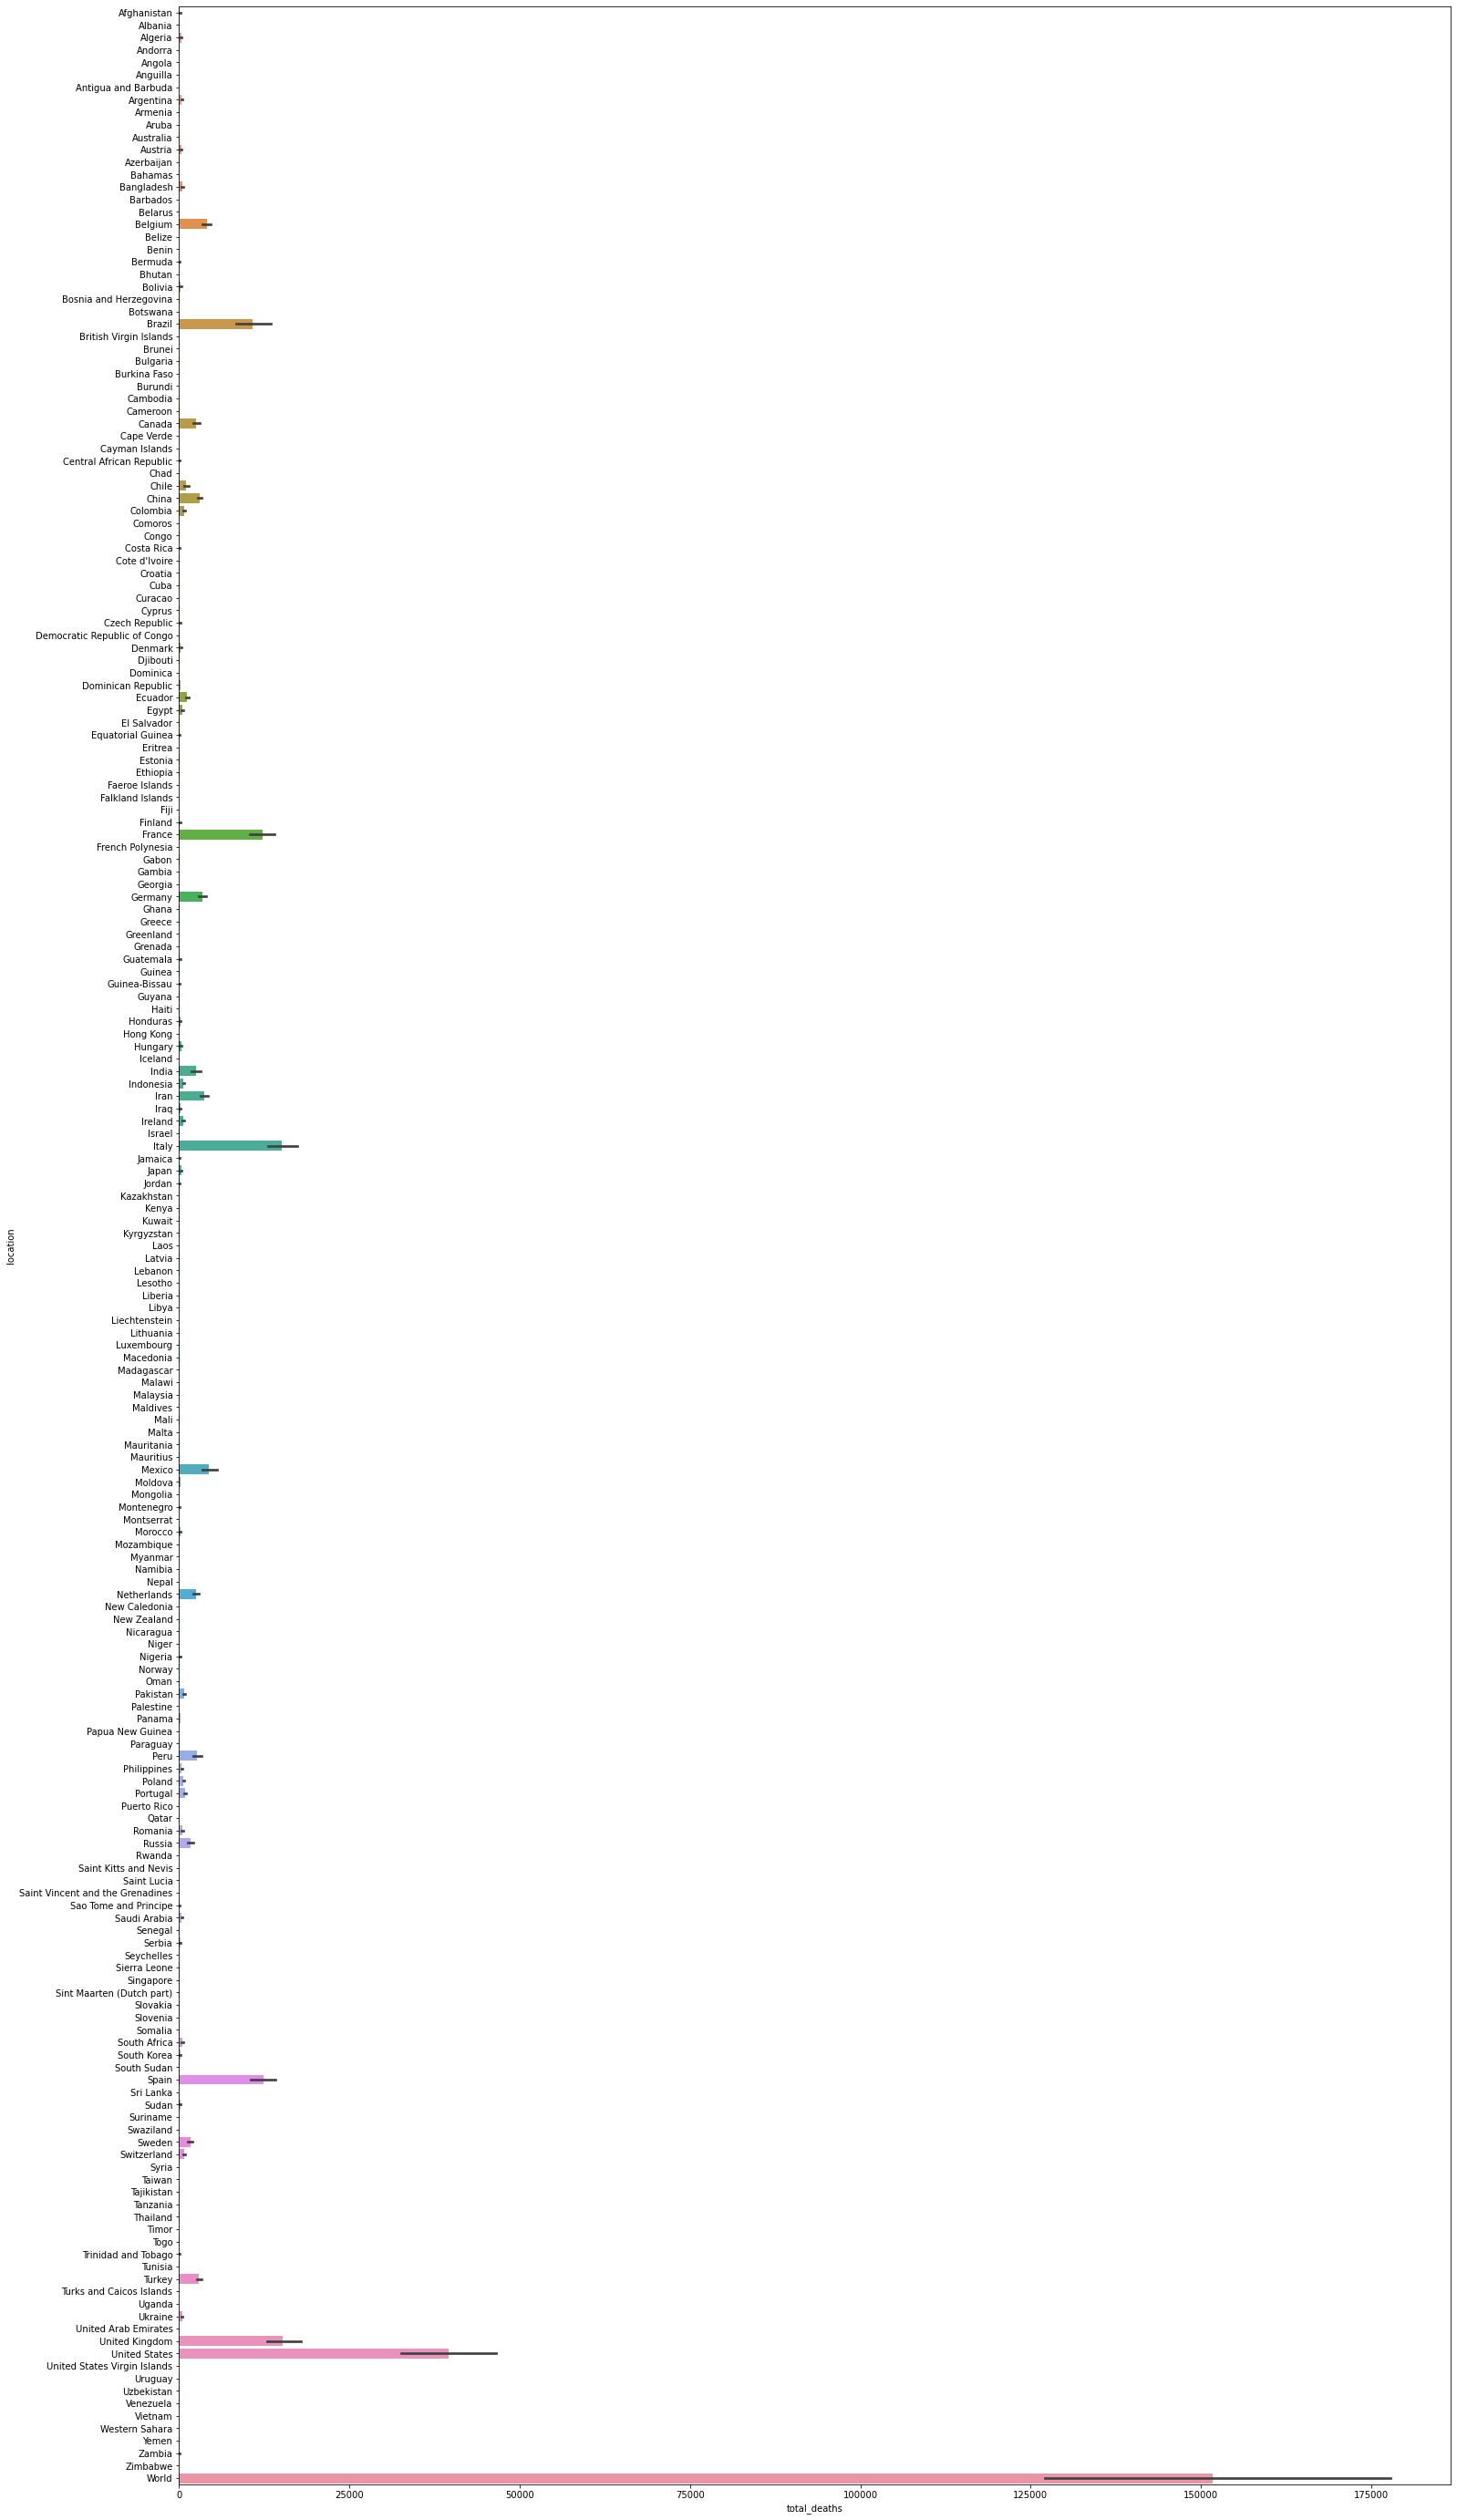

In [3]:
plt.figure(figsize=(25,50))
sns.barplot(y=data['location'], x=data['total_deaths'])

Mittelwert mit Varianz der Todesfälle pro Tag pro Land => unten im Dataset in der Spalte "location" sind Informationen über die ganze Welt => eigenes Diagramm für globale Todesfälle

#### Graph über insgesamte Tode global:

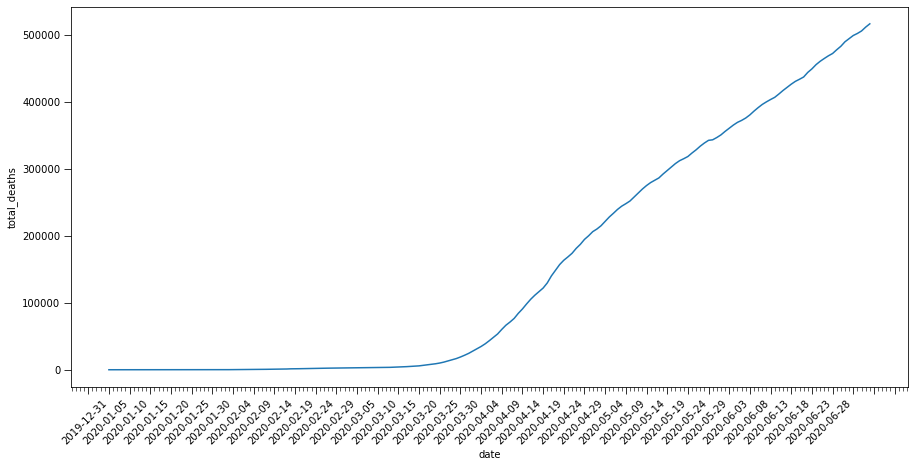

In [4]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45, horizontalalignment='right')
plot = sns.lineplot(x=data.iloc[25878:,3], y=data['total_deaths'])

plot.xaxis.set_minor_locator(MultipleLocator(1))
plot.xaxis.set_major_locator(MultipleLocator(5))
plot.tick_params(which='major', length=7)
plot.tick_params(which='minor', length=4)

        



Beginn der globalen Todesfälle ab dem 19.3.2020; vorher fast keine Todesfälle zu verzeichnen
=> erste Erkenntnis: Todesfälle von Corona gab es erst häufiger ab Mitte März => Vergleichen mit anderen Spalten, wie total_cases, um Korrelationen zu finden

#### Graph über insgesamt Infizierte global:

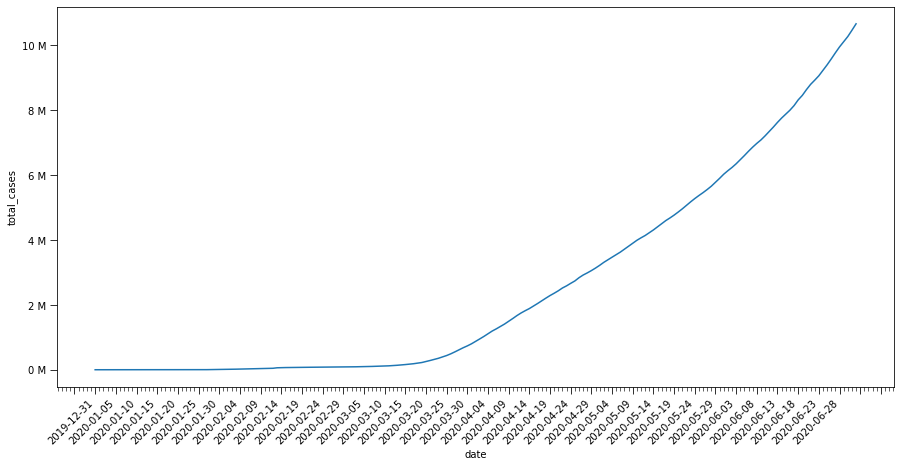

In [5]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45, horizontalalignment='right')
plot = sns.lineplot(x=data.iloc[25878:,3], y=data['total_cases'])
ylabels = ['{:,.0f}'.format(y) + ' M' for y in plot.get_yticks()/1000000]

plot.xaxis.set_minor_locator(MultipleLocator(1))
plot.xaxis.set_major_locator(MultipleLocator(5))
plot.tick_params(which='major', length=7)
plot.tick_params(which='minor', length=4)


plot.set_yticklabels(ylabels)
plot

Dasselbe Ergebnis => Die Fälle steigen erst ab Mitte März, steigen aber viel schneller als die Tode (da y-Achse anders skaliert)

Suchen von weiteren Spalten, die in die Visualisierung aufgenommen werden könnten

#### Neue tägliche Tode global:

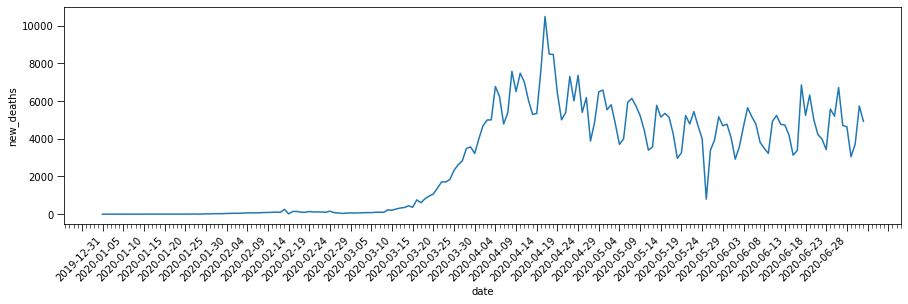

In [6]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=45, horizontalalignment='right')
plot = sns.lineplot(x=data.iloc[25878:,3], y=data['new_deaths'])

plot.xaxis.set_minor_locator(MultipleLocator(1))
plot.xaxis.set_major_locator(MultipleLocator(5))
plot.tick_params(which='major', length=7)
plot.tick_params(which='minor', length=4)



Hier ist der Graph nicht kumulativ, sondern es wird die Anzahl der Tode pro Tag gemessen => hier beginnen die Tode nicht erst Mitte März, sondern schon Mitte Februar => Tode waren im insgesamten Aspekt nicht so ausschlaggebend wie hier pro Tag; großer Spike an Toden Mitte April

#### Graph über täglich neue Infizierte global:

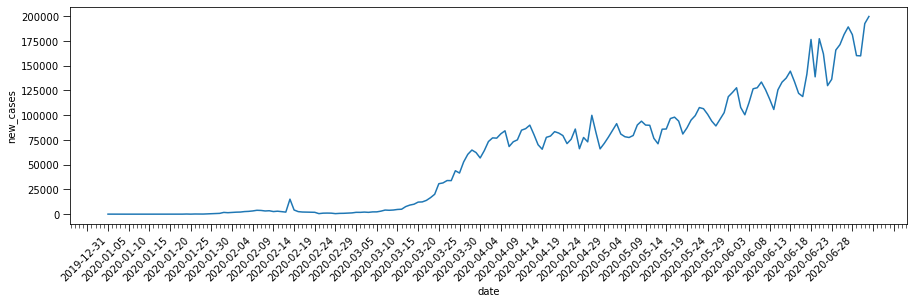

In [7]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=45, horizontalalignment='right')
plot = sns.lineplot(x=data.iloc[25878:,3], y=data['new_cases'])

plot.xaxis.set_minor_locator(MultipleLocator(1))
plot.xaxis.set_major_locator(MultipleLocator(5))
plot.tick_params(which='major', length=7)
plot.tick_params(which='minor', length=4)

Dasselbe wie bei new_deaths, nur dass die cases über die Zeit ansteigen => wichtiger Punkt in Visualisierung; Mitte März größter Anstieg bei neuen Fällen => deckt sich mit dem großen Spike an Toden im obigen Graphen, aber Zeitverschoben, wegen der 2-wöchigen Inkubationszeit von covid-19

---
## Umwandlung des Datasets:

Neue Spalten suchen zur Aufnahme in die Visualisierung:

In [8]:
pd.set_option('display.max_columns', None)
display(data)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26058,OWID_WRL,NaN,World,2020-06-28,9953229.0,181386.0,498550.0,4633.0,1276.906,23.270,63.959,0.594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58
26059,OWID_WRL,NaN,World,2020-06-29,10113462.0,160233.0,501597.0,3047.0,1297.463,20.556,64.350,0.391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58
26060,OWID_WRL,NaN,World,2020-06-30,10273424.0,159962.0,505309.0,3712.0,1317.985,20.522,64.826,0.476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58
26061,OWID_WRL,NaN,World,2020-07-01,10465987.0,192563.0,511045.0,5736.0,1342.689,24.704,65.562,0.736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58


Für Visualisierung interessante Spalten wären total_cases_per_million, new_cases_per_million, total_deaths_per_million und new_deaths_per_million, da sie anzeigen wie viele Menschen infiziert/gestorben sind anhand der Population => kleine Länder erscheinen nicht als hätten sie viele Todesfälle und geben keinen falschen Eindruck über den Prozentsatz an infizierten/gestorbenen; außerdem wichtig könnte der Bezug zwischen population_density und den vorherigen Spalten sein => Rest unwichtig und zu viel zum visualisieren

In [9]:
data = data.drop(data.columns[22:], axis=1)
data = data.drop(data.columns[12:21], axis=1)
data = data.fillna(0.0)


data

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,population_density
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,54.422
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,54.422
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,54.422
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,54.422
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,54.422
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26058,OWID_WRL,0,World,2020-06-28,9953229.0,181386.0,498550.0,4633.0,1276.906,23.270,63.959,0.594,58.045
26059,OWID_WRL,0,World,2020-06-29,10113462.0,160233.0,501597.0,3047.0,1297.463,20.556,64.350,0.391,58.045
26060,OWID_WRL,0,World,2020-06-30,10273424.0,159962.0,505309.0,3712.0,1317.985,20.522,64.826,0.476,58.045
26061,OWID_WRL,0,World,2020-07-01,10465987.0,192563.0,511045.0,5736.0,1342.689,24.704,65.562,0.736,58.045


Neues angepasstes Dataset mit allen wichtigen Informationen, alle NaN wurden durch 0.0 ersetzt und das Datum wurde in den europäischen Standard übersetzt => neues Datums Format für restliche Graphen

---
## Graphen der restlichen Spalten:

#### Graph über insgesamt Infizierte pro Millionen Menschen global:

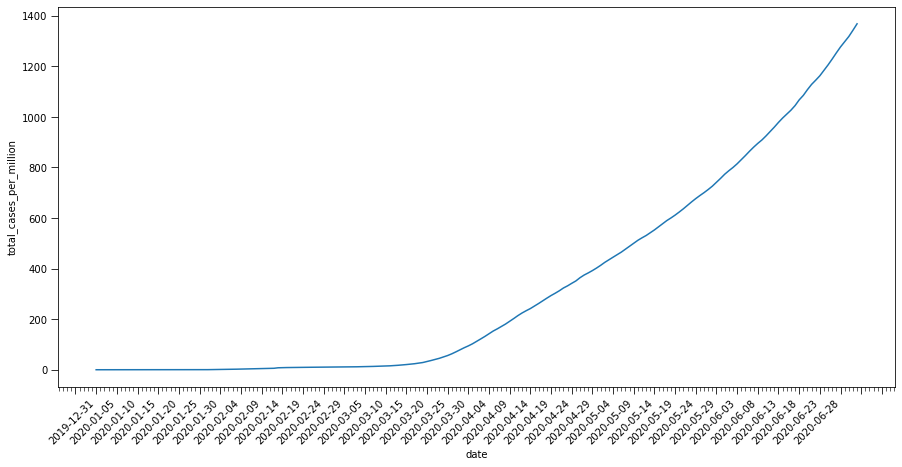

In [10]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45, horizontalalignment='right')
plot = sns.lineplot(x=data.iloc[25878:,3], y=data['total_cases_per_million'])

plot.xaxis.set_minor_locator(MultipleLocator(1))
plot.xaxis.set_major_locator(MultipleLocator(5))
plot.tick_params(which='major', length=7)
plot.tick_params(which='minor', length=4)


Zuerst total_cases_per_million, also die Infizierten der ganzen Welt pro Millionen Bewohner => einzelne Länder werden in der Visualisierung zu sehen sein, hier nur die ganze Welt

#### Graph über täglich neu Infizierte pro Millionen Menschen global:

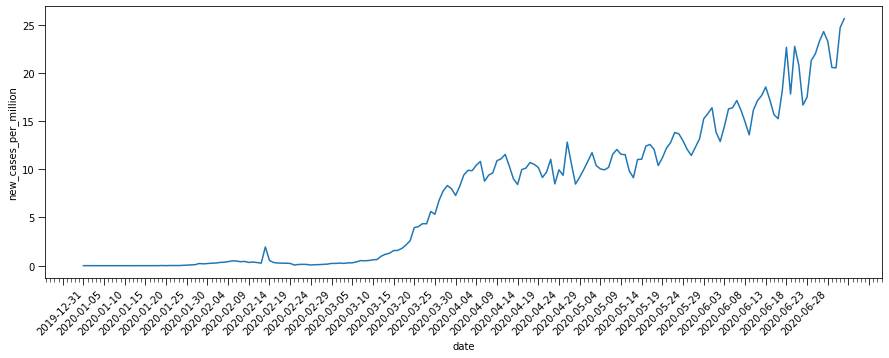

In [11]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45, horizontalalignment='right')
plot = sns.lineplot(x=data.iloc[25878:,3], y=data['new_cases_per_million'])

plot.xaxis.set_minor_locator(MultipleLocator(1))
plot.xaxis.set_major_locator(MultipleLocator(5))
plot.tick_params(which='major', length=7)
plot.tick_params(which='minor', length=4)


Erkenntnis: der Höchstwert an neuen Infizierten pro Million Bewohner liegt bei 25 pro Tag => für kleinere Länder verheerender als für größere, da der Prozentsatz der Infizierten pro Tag wächst

#### Graph über insgesamte Tode pro Millionen Menschen global:

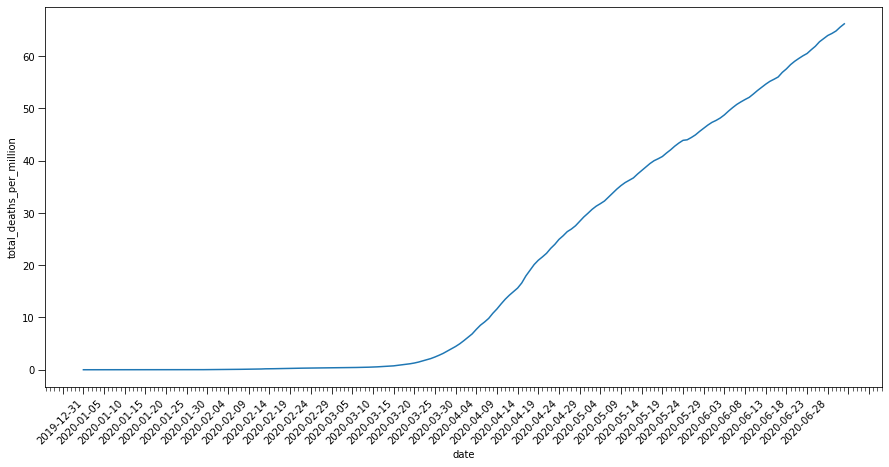

In [12]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45, horizontalalignment='right')
plot = sns.lineplot(x=data.iloc[25878:,3], y=data['total_deaths_per_million'])

plot.xaxis.set_minor_locator(MultipleLocator(1))
plot.xaxis.set_major_locator(MultipleLocator(5))
plot.tick_params(which='major', length=7)
plot.tick_params(which='minor', length=4)


Dasselbe wie vorher nur für die Todesfälle pro Millionen Bewohner => beinahe konstant ansteigend seit Mitte März

#### Graph über tägliche neue Tode pro Millionen Menschen global:

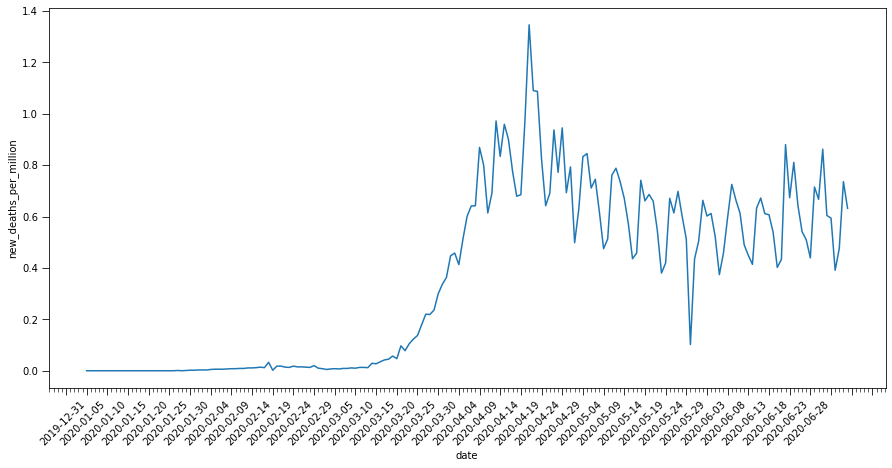

In [13]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45, horizontalalignment='right')
plot = sns.lineplot(x=data.iloc[25878:,3], y=data['new_deaths_per_million'])

plot.xaxis.set_minor_locator(MultipleLocator(1))
plot.xaxis.set_major_locator(MultipleLocator(5))
plot.tick_params(which='major', length=7)
plot.tick_params(which='minor', length=4)

Hier ist der Spike der Todesfälle Mitte April noch sichtbarer als vorher => erste große Todeswelle; auch ist Ende Mai ein starker Fall der Todesfälle zu verzeichnen, aber danach steigen die Todesfälle pro Tag wieder

---
## Kombination mit Bevölkerungsdichte

### Todesfälle
---

#### Insgesamte Todesfälle:

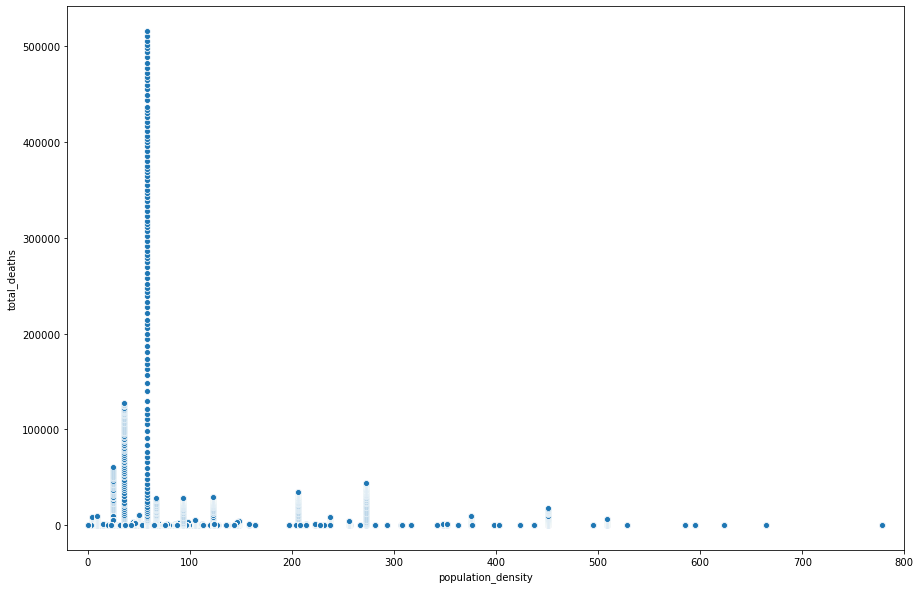

In [14]:
plt.figure(figsize=(15,10))
plt.xlim(-20,800)
#x-Labels wurden limitiert, da es einen Ausreißer bei der Bervölkerungsdichte bei 20000 pro km^2 gab(Macao),
#der den Graphen verfälscht hätte

sns.scatterplot(x=data['population_density'], y=data['total_deaths'])

Graph würde suggerieren, dass es am schlechtesten ist, in einem Land mit einer Bevölkerungsdichte von 50 bis 60 Menschen pro km^2 zu leben, aber dieser Graph zeigt nur die insgesamten Tode => da es mehr Länder mit einer Bevölkerungsdichte von 50 bis 60 Menschen pro km^2 gibt, verfälschen sie den Graphen => Ausweichen auf total_deaths_per_million für einen unverfälschten Graphen

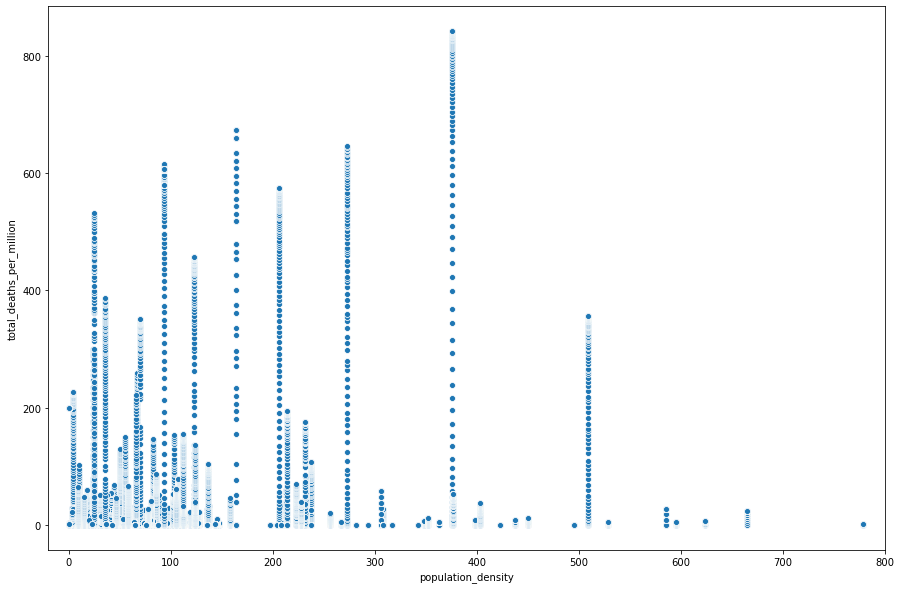

In [15]:
plt.figure(figsize=(15,10))
plt.xlim(-20,800)

sns.scatterplot(x=data['population_density'], y=data['total_deaths_per_million'])

Hier sieht man den richtigen Graphen: je dichter das Land besiedelt ist, desto höher ist die Zahl der Todesfälle auch wenn es einige Ausreißer gibt (Mangel an Daten) => Maximum bei 550 Menschen pro km^2

#### Neue Todesfälle pro Tag:

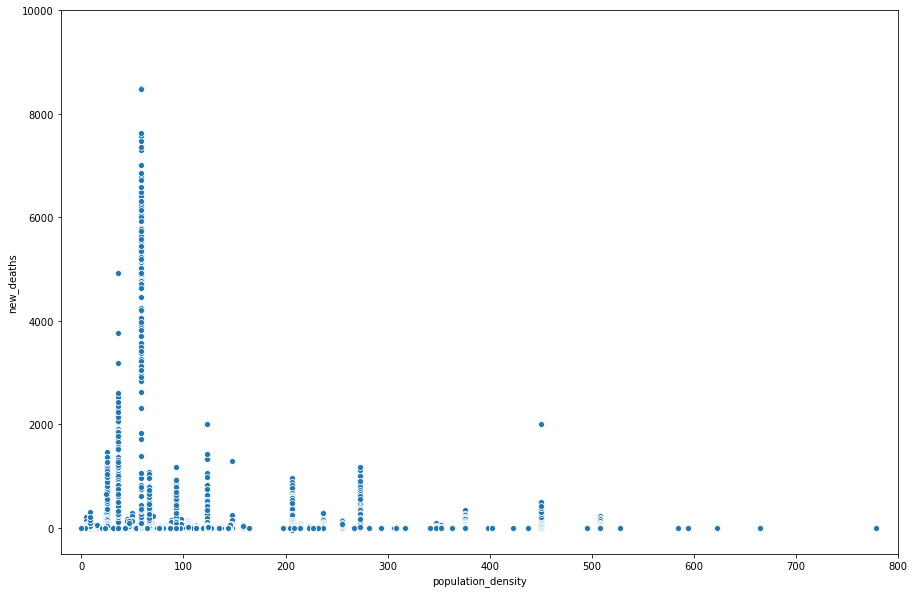

In [16]:
plt.figure(figsize=(15,10))
plt.xlim(-20,800)
plt.ylim(-500, 10000)

sns.scatterplot(x=data['population_density'], y=data['new_deaths'])

Gleiches Ergebnis wie bei total_deaths => new_deaths_per_million betrachten

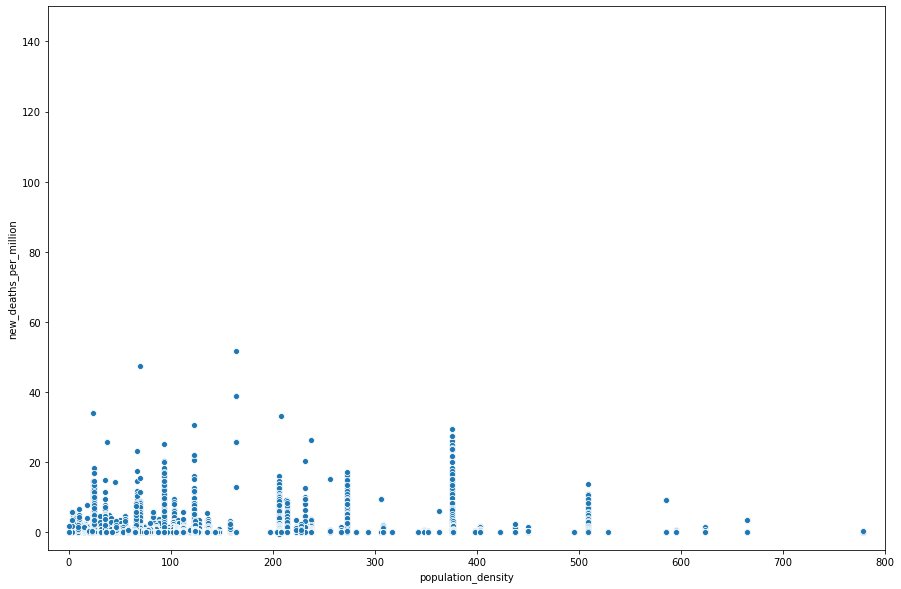

In [17]:
plt.figure(figsize=(15,10))
plt.xlim(-20,800)
plt.ylim(-5, 150)

sns.scatterplot(x=data['population_density'], y=data['new_deaths_per_million'])

Gleiches Ergebnis wie bei total_deaths_per_million, nur weniger offensichtlich

### Infizierte
---

#### Insgesamt Infizierte:

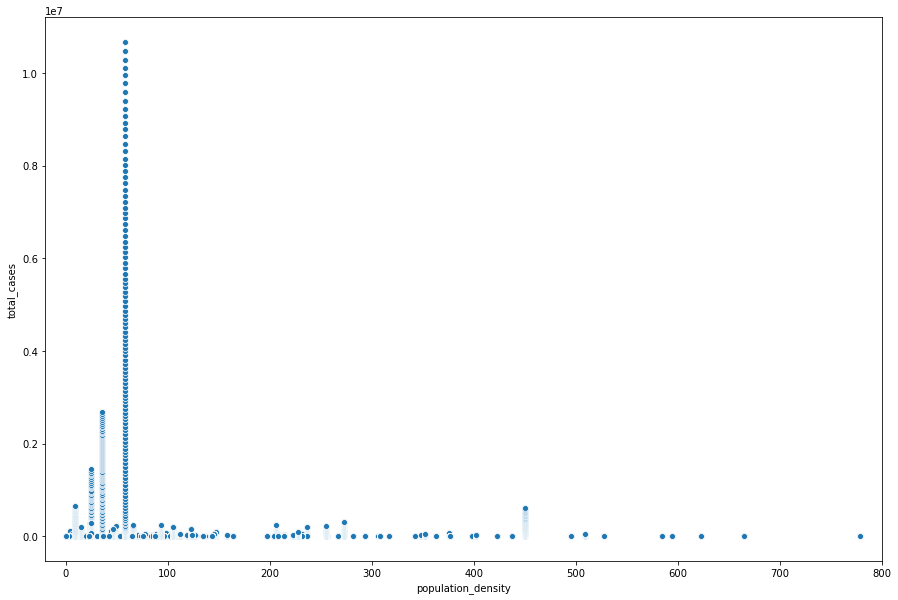

In [18]:
plt.figure(figsize=(15,10))
plt.xlim(-20,800)


sns.scatterplot(x=data['population_density'], y=data['total_cases'])

Gleiche Verteilung wie bei total_deaths => wieder Betrachtung von total_cases_per_million

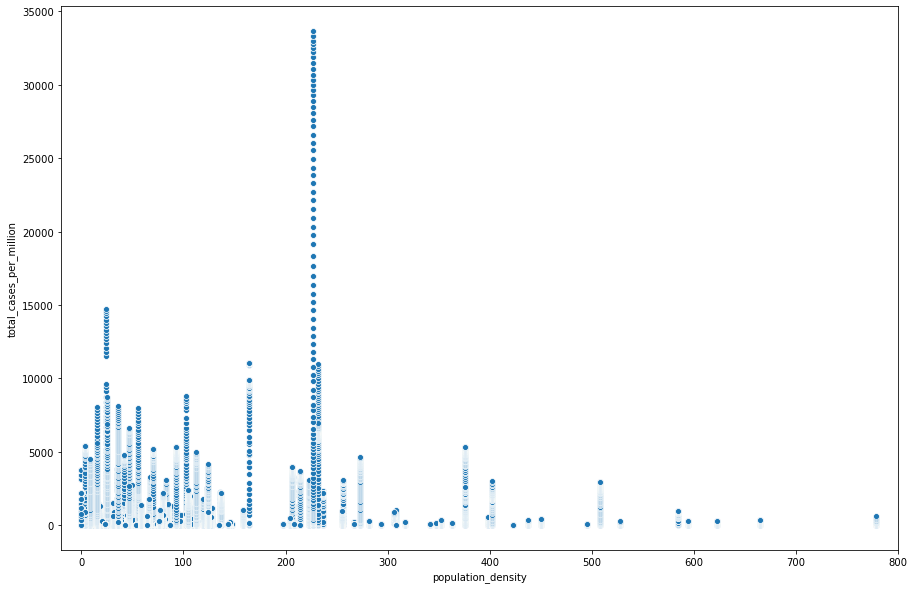

In [19]:
plt.figure(figsize=(15,10))
plt.xlim(-20,800)


sns.scatterplot(x=data['population_density'], y=data['total_cases_per_million'])

Maxima bei ungefähr 220 Menschen pro km^2 => möglicherweise Mangel an Daten bei anderen Bevölkerungsdichten

#### Neue Infizierte pro Tag:

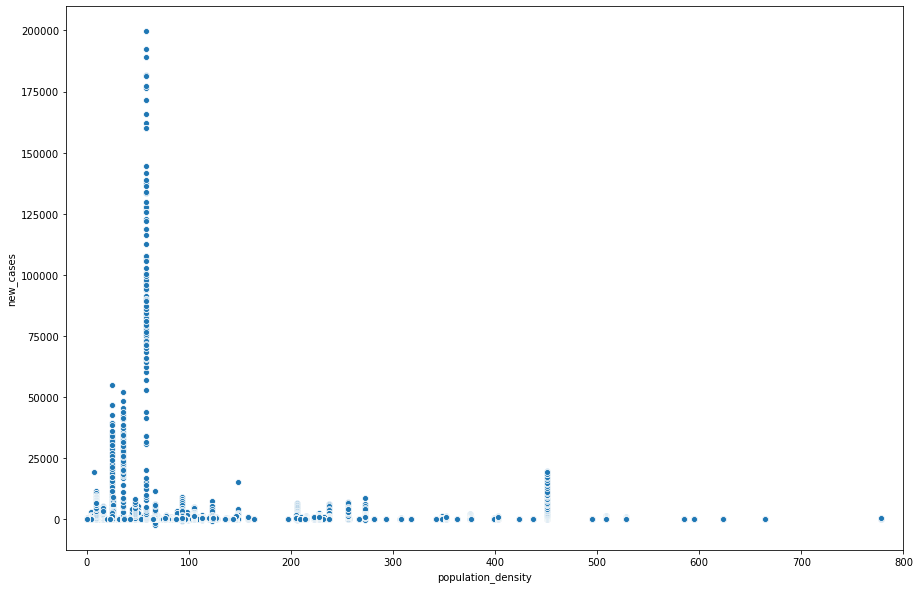

In [20]:
plt.figure(figsize=(15,10))
plt.xlim(-20,800)


sns.scatterplot(x=data['population_density'], y=data['new_cases'])

Gleiche Verteilung wie bei total_cases, total_deaths und new_deaths => Betrachtung von new_cases_per_million

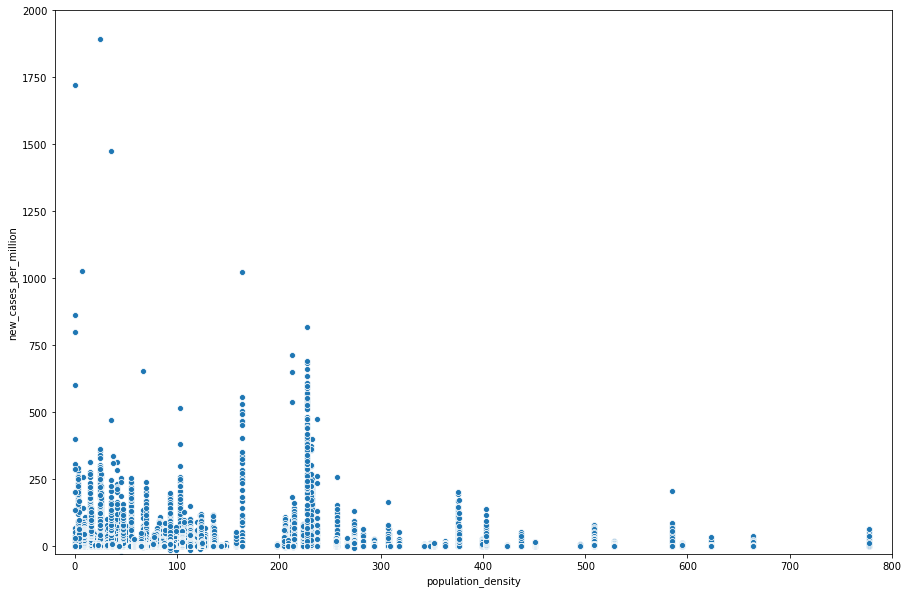

In [21]:
plt.figure(figsize=(15,10))
plt.xlim(-20,800)
plt.ylim(-30,2000)


sns.scatterplot(x=data['population_density'], y=data['new_cases_per_million'])

Verteilung sehr ausgeglichen, aber wieder Maximum bei 220 Menschen pro km^2; Ausreißer bei ungefähr 20 Menschen pro km^2 => möglicherweise Land mit schlechtem Gesundheitssystem

---
# Erkenntnisse:

---
## Erste Graphen:

- Anstieg der Infizierten und der Todesfälle erst ab Mitte März
- Spike der Todesfälle Mitte März, da 2 Wochen vorher ein großer Anstieg an neuen Infizierten war

---
## Graphen der restlichen Spalten:

- Mehr Todesfälle pro Millionen ist für kleinere Länder verheerender als für größere Länder, da der Prozentsatz der Toten höher ist
- Ende Mai gibt es einen kurzen starken Fall der Todesfälle, der sich danach wieder ausgeglichen hat

---
## Kombination mit Bevölkerungsdichte:

#### Todesfälle:
- je dichter das Land besiedelt ist, desto mehr Todesfälle gibt es => Maximum bei 550 Menschen pro km^2

#### Infizierte:
- Maxima bei ungefähr 220 Menschen pro km^2 => deckt sich mit Todesfällen

---

In [22]:
data['date'] = pd.to_datetime(data.date)
data['date'] = data['date'].dt.strftime('%d.%m.%Y')
data

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,population_density
0,AFG,Asia,Afghanistan,31.12.2019,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,54.422
1,AFG,Asia,Afghanistan,01.01.2020,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,54.422
2,AFG,Asia,Afghanistan,02.01.2020,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,54.422
3,AFG,Asia,Afghanistan,03.01.2020,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,54.422
4,AFG,Asia,Afghanistan,04.01.2020,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,54.422
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26058,OWID_WRL,0,World,28.06.2020,9953229.0,181386.0,498550.0,4633.0,1276.906,23.270,63.959,0.594,58.045
26059,OWID_WRL,0,World,29.06.2020,10113462.0,160233.0,501597.0,3047.0,1297.463,20.556,64.350,0.391,58.045
26060,OWID_WRL,0,World,30.06.2020,10273424.0,159962.0,505309.0,3712.0,1317.985,20.522,64.826,0.476,58.045
26061,OWID_WRL,0,World,01.07.2020,10465987.0,192563.0,511045.0,5736.0,1342.689,24.704,65.562,0.736,58.045


Anpassen der Datumsangaben an den europäischen Standard

# Exportieren des veränderten Datasets:

In [23]:
data.to_csv('../data/corona_dataset.csv', sep=',') 

Exportieren des datasets in die Datei corona_dataset.csv mit Kommas separiert